Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B5.TIF


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


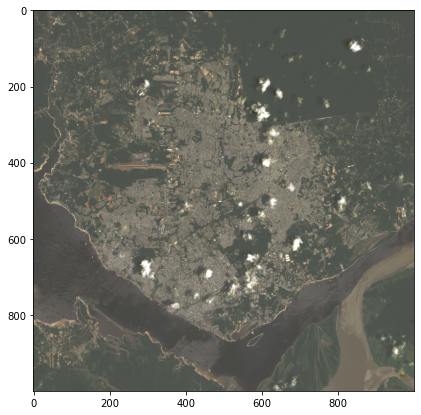

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import rasterio
from pathlib import Path

def load_landsat_image(img_folder, bands):
    image = {}
    path = Path(img_folder)
    for band in bands:
        # considering the landsat images end with *_SR_B#.TIF, we will use it to locate the correct file
        file = next(path.glob(f'*_SR_{band}.tif'))
        print(f'Opening file {file}')
        ds = rasterio.open(file)
        image.update({band: ds.read(1)})

    return image

# load the image
img = load_landsat_image('D:/Images/Landsat/LC08_L2SP_231062_20201026_20201106_02_T1/', ['B2', 'B3', 'B4', 'B5'])

# stack the layers to create a cube
rgb = np.stack([img['B4'], img['B3'], img['B2']], axis=-1)

# normalize the values
rgb = rgb/rgb.max() * 2

# display the image with a slightly increased figure size
plt.figure(figsize=(7,7))
plt.imshow(rgb[4000:5000, 5400:6400, 0:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


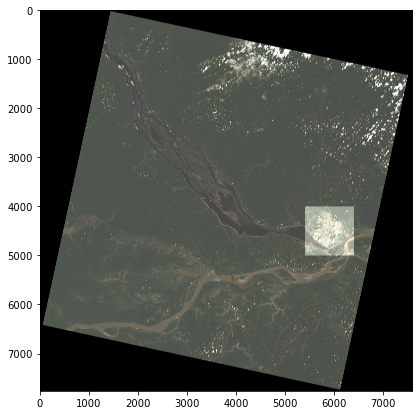

In [2]:
rgb[4000:5000, 5400:6400, 0:3] = rgb[4000:5000, 5400:6400, 0:3] * 2
plt.figure(figsize=(7,7))
plt.imshow(rgb)

Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B5.TIF


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


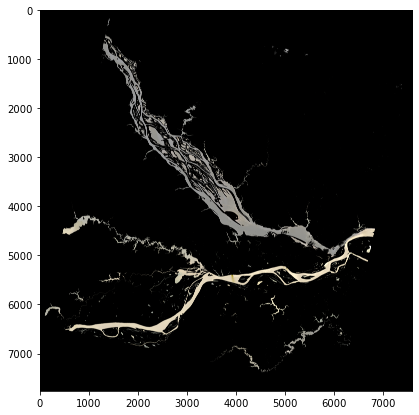

In [3]:
def normalized_difference(img, b1, b2, eps=0.0001):
    band1 = np.where((img[b1]==0) & (img[b2]==0), np.nan, img[b1])
    band2 = np.where((img[b1]==0) & (img[b2]==0), np.nan, img[b2])
    
    return (band1 - band2) / (band1 + band2)

img = load_landsat_image('D:/Images/Landsat/LC08_L2SP_231062_20201026_20201106_02_T1/', ['B2', 'B3', 'B4', 'B5'])

# create the normalized rgb cube
rgb = np.stack([img['B4'], img['B3'], img['B2']], axis=-1)
rgb = rgb/rgb.max() * 2

# calc the MNDWI index
mndwi = normalized_difference(img, 'B3', 'B5')

# get a Boolean water mask
water_mask = mndwi > 0.0

# Assign 0 to values outside the mask
rgb[~water_mask] = 0

# display result
plt.figure(figsize=(7,7))
plt.imshow(rgb*2)

Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B5.TIF


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


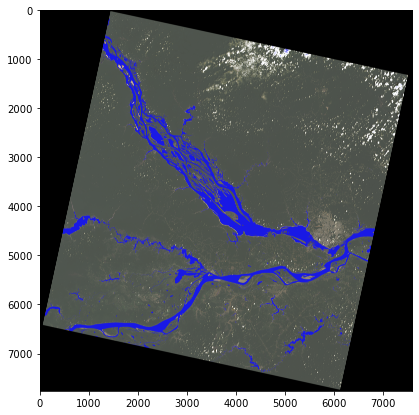

In [4]:
img = load_landsat_image('D:/Images/Landsat/LC08_L2SP_231062_20201026_20201106_02_T1/', ['B2', 'B3', 'B4', 'B5'])

# create the normalized rgb cube
rgb = np.stack([img['B4'], img['B3'], img['B2']], axis=-1)
rgb = rgb/rgb.max() * 2

# Assign values R=0.1, G=0.1 and B=0.9 to the water pixels
rgb[water_mask] = [0.1, 0.1, 0.9]

# display result
plt.figure(figsize=(7,7))
plt.imshow(rgb)

Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B1.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B2.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B3.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B4.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B5.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B6.TIF
Opening file D:\Images\Landsat\LC08_L2SP_231062_20201026_20201106_02_T1\LC08_L2SP_231062_20201026_20201106_02_T1_SR_B7.TIF


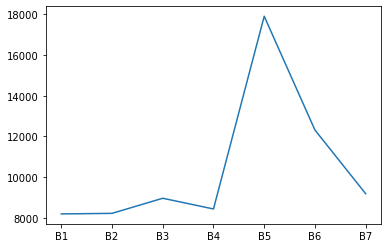

In [5]:
def stack_img(img, bands):
    # create a list of the band's arrays
    bands_arrays = [img[band] for band in bands]
    return np.stack(bands_arrays, axis=-1)
    

bands = ['B1','B2', 'B3', 'B4', 'B5', 'B6', 'B7']
img = load_landsat_image('D:/Images/Landsat/LC08_L2SP_231062_20201026_20201106_02_T1/', bands)

cube = stack_img(img, bands)

plt.plot(bands, cube[4010, 4010])

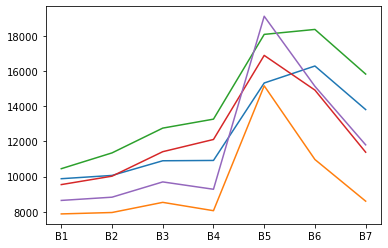

In [6]:
n_index = np.random.randint(4000, 5000, size=(5))
m_index = np.random.randint(5400, 6400, size=(5))

for i in range(5):
    plt.plot(bands, cube[n_index[i], m_index[i]])

In [7]:
water_pts = cube[water_mask] / 10000
water_pts.shape

(3062430, 7)

In [8]:
water_pts[:5]

array([[0.7962, 0.7995, 0.8006, 0.7976, 0.7857, 0.8014, 0.7663],
       [0.7941, 0.7894, 0.7922, 0.7787, 0.7914, 0.7727, 0.753 ],
       [0.8146, 0.808 , 0.8061, 0.7915, 0.7956, 0.7782, 0.7565],
       [0.8052, 0.8007, 0.8017, 0.7945, 0.8007, 0.7591, 0.7458],
       [0.8009, 0.7959, 0.7938, 0.7847, 0.7932, 0.7542, 0.743 ]])

In [9]:
water_pts.mean()

0.8466179462854205

In [10]:
wls = [0.44, 0.47, 0.56, 0.655, 0.865, 1.61, 2.2]
mean = water_pts.mean(axis=0)
std = water_pts.std(axis=0)
mean.shape, std.shape

((7,), (7,))

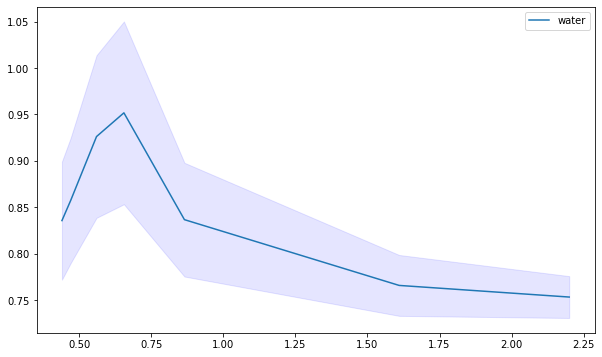

In [11]:
plt.figure(figsize=(10,6))
plt.plot(wls, mean, label='water')
plt.fill_between(wls, mean-0.5*std, mean+0.5*std, color='blue', alpha=0.1)
plt.legend()

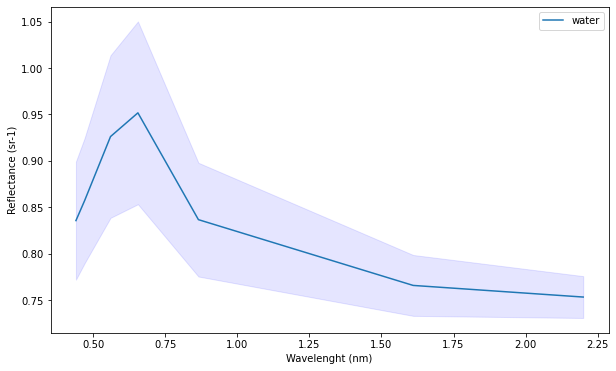

In [12]:
# get the water pixels (remember it has 7 channels)
water_pts = cube[water_mask] / 10000

# create the wavelenghts list
wls = [0.44, 0.47, 0.56, 0.655, 0.865, 1.61, 2.2]

# get mean and std vectors, by reducint in the first axis
mean = water_pts.mean(axis=0)
std = water_pts.std(axis=0)

# plot the spectrum
plt.figure(figsize=(10,6))
plt.plot(wls, mean, label='water')
plt.fill_between(wls, mean-0.5*std, mean+0.5*std, color='blue', alpha=0.1)
plt.xlabel('Wavelenght (nm)')
plt.ylabel('Reflectance (sr-1)')
plt.legend()

## Additional
This code will plot the spectra of water pixels and vegetation to compare them in the same plot.

In [22]:
ndvi = normalized_difference(img, 'B5', 'B4')
veg_mask = ndvi > 0.25 # adopting a threshold of 0.5 for the vegetation

In [25]:
veg_pts = cube[veg_mask]/10000
veg_mean = veg_pts.mean(axis=0)
veg_std = veg_pts.std(axis=0)

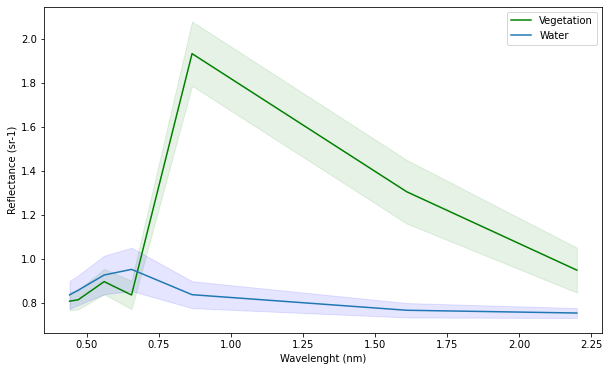

In [32]:
# plot the spectrum
plt.figure(figsize=(10,6))

# plot vegetation
plt.plot(wls, veg_mean, label='Vegetation', color='green')
plt.fill_between(wls, veg_mean-veg_std, veg_mean+veg_std, color='green', alpha=0.1)

# plot water
plt.plot(wls, mean, label='Water')
plt.fill_between(wls, mean-0.5*std, mean+0.5*std, color='blue', alpha=0.1)

plt.xlabel('Wavelenght (nm)')
plt.ylabel('Reflectance (sr-1)')
plt.legend()